## <center>Geospatial Data Analysis Using Boston Crime Data

### Import Libraries

In [1]:

import pandas as pd
import folium #https://python-visualization.github.io/folium/quickstart.html
              #https://python-visualization.github.io/folium/
import math
from folium.plugins import MarkerCluster,HeatMap,CirclePattern
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import datetime
from plotly.subplots import make_subplots

### Import Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/VinitaSilaparasetty/coursera-spatial-data-analysis/master/boston-crime%202.csv')
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Date,Time
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13,09:28:24
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12,20:11:26
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:43,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12,15:12:43
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:52,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12,04:41:52
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:49,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02,08:08:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,I192078066,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,B2,259,NaN,2019-09-23 16:15:00,2019,9,Monday,16,Part Three,MAGNOLIA ST,42.314784,-71.071610,"(42.31478432, -71.07160997)",2019-09-23,16:15:00
468,I192078065,616,Larceny,LARCENY THEFT OF BICYCLE,D14,759,NaN,2019-09-16 10:00:00,2019,9,Monday,10,Part One,BIGELOW ST,42.351997,-71.167683,"(42.35199741, -71.16768308)",2019-09-16,10:00:00
469,I192078064,3201,Property Lost,PROPERTY - LOST,D4,140,NaN,2019-08-01 09:00:00,2019,8,Thursday,9,Part Three,GLOUCESTER ST,42.350533,-71.084818,"(42.35053286, -71.08481789)",2019-08-01,09:00:00
470,I192078063,3207,Property Found,PROPERTY - FOUND,E5,691,NaN,2019-09-27 13:18:00,2019,9,Friday,13,Part Three,CENTRE ST,42.287094,-71.148221,"(42.28709355, -71.14822128)",2019-09-27,13:18:00


### Generate Base Map

In [3]:
boston=(42.358443, -71.05977)
m=folium.Map(location=boston, tiles='Stamen Terrain', zoom_start=12)
m

### Mark Crime Scenes

In [4]:
# marker clustering utility helps you to manage multiple markers at different zoom levels. When a user views the map at a high zoom level, the individual markers show on the map. When the user zooms out, the markers gather together into clusters, to make viewing the map easier.
mc=MarkerCluster()

In [5]:
for idx,row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(folium.Marker([row['Lat'], row['Long']]))
m.add_child(mc)        

### View Districts with Highest Crime Rates

In [6]:
crime=df.groupby(['DISTRICT', 'STREET', 'REPORTING_AREA', 'Lat', 'Long']).sum().reset_index()
crime.head(10)

,DISTRICT,STREET,REPORTING_AREA,Lat,Long,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR
0,A1,ARLINGTON ST,128,42.348670,-71.069389,3201,0.0,2019,9,10
1,A1,ATLANTIC AVE,110,42.354009,-71.052853,3831,0.0,2019,9,3
2,A1,ATLANTIC AVE,114,42.354383,-71.052133,2647,0.0,2019,9,15
3,A1,CAUSEWAY ST,75,42.364331,-71.063193,1825,0.0,4038,18,8
4,A1,CAUSEWAY ST,75,42.364975,-71.062044,2405,0.0,2019,9,21
5,A1,CHARLES ST,64,42.361928,-71.070820,10183,0.0,12114,54,128
6,A1,CHESTNUT ST,70,42.357640,-71.067032,3410,0.0,2019,9,7
7,A1,COURT ST,92,42.358923,-71.058354,3623,0.0,4038,18,24
8,A1,FANEUIL HALL MARKETPLACE,93,42.359980,-71.054741,1830,0.0,2019,9,10
9,A1,FANEUIL HALL SQ,93,42.360205,-71.056208,613,0.0,2019,9,19


In [7]:
crime.update(crime['DISTRICT'].map('District:{}'.format))


In [8]:
crime


,DISTRICT,STREET,REPORTING_AREA,Lat,Long,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR
0,District:A1,ARLINGTON ST,128,42.348670,-71.069389,3201,0.0,2019,9,10
1,District:A1,ATLANTIC AVE,110,42.354009,-71.052853,3831,0.0,2019,9,3
2,District:A1,ATLANTIC AVE,114,42.354383,-71.052133,2647,0.0,2019,9,15
3,District:A1,CAUSEWAY ST,75,42.364331,-71.063193,1825,0.0,4038,18,8
4,District:A1,CAUSEWAY ST,75,42.364975,-71.062044,2405,0.0,2019,9,21
...,...,...,...,...,...,...,...,...,...,...
386,District:E5,SOUTH ST,676,42.288025,-71.143697,3802,0.0,2019,9,12
387,District:E5,TOBIN RD,714,42.259006,-71.160679,3301,0.0,2019,9,21
388,District:E5,TYNDALE ST,672,42.287186,-71.136805,3503,0.0,2019,9,17
389,District:E5,WALTER ST,663,42.293797,-71.130566,3006,0.0,2019,9,19


In [9]:
crime.update(crime['REPORTING_AREA'].map('Reports:{}'.format))

In [10]:
crime

,DISTRICT,STREET,REPORTING_AREA,Lat,Long,OFFENSE_CODE,SHOOTING,YEAR,MONTH,HOUR
0,District:A1,ARLINGTON ST,Reports:128,42.348670,-71.069389,3201,0.0,2019,9,10
1,District:A1,ATLANTIC AVE,Reports:110,42.354009,-71.052853,3831,0.0,2019,9,3
2,District:A1,ATLANTIC AVE,Reports:114,42.354383,-71.052133,2647,0.0,2019,9,15
3,District:A1,CAUSEWAY ST,Reports:75,42.364331,-71.063193,1825,0.0,4038,18,8
4,District:A1,CAUSEWAY ST,Reports:75,42.364975,-71.062044,2405,0.0,2019,9,21
...,...,...,...,...,...,...,...,...,...,...
386,District:E5,SOUTH ST,Reports:676,42.288025,-71.143697,3802,0.0,2019,9,12
387,District:E5,TOBIN RD,Reports:714,42.259006,-71.160679,3301,0.0,2019,9,21
388,District:E5,TYNDALE ST,Reports:672,42.287186,-71.136805,3503,0.0,2019,9,17
389,District:E5,WALTER ST,Reports:663,42.293797,-71.130566,3006,0.0,2019,9,19


In [11]:
m2=folium.Map(location=boston, tiles="Stamen Toner", zoom_start=12)
HeatMap(data=crime[['Lat', 'Long']], radius=15).add_to(m2)
#https://python-visualization.github.io/folium/modules.html search circlemaker 
#circlemaker:A circle of a fixed size with radius specified in pixels.
def plotDot(point): 
    folium.vector_layers.CircleMarker(location=[point.Lat,point.Long],
                      radius=5,
                      weight=2,
                      popup=[point.DISTRICT,point.REPORTING_AREA],
                      fill_color='#ffffff').add_to(m2)
crime.apply(plotDot,axis=1)
#Computes the bounds of the object itself (not including it’s children) in the form [[lat_min, lon_min], [lat_max, lon_max]]
m2.fit_bounds(m2.get_bounds())
m2    

### Medical Assistance Analysis

In [12]:
med=df.loc[df.OFFENSE_CODE_GROUP=='Medical Assistance'][['Lat', 'Long']]
med

,Lat,Long
23,42.355942,-71.062583
53,42.307342,-71.105441
58,42.309692,-71.072859
73,42.341288,-71.054679
75,42.320778,-71.105538
83,42.319757,-71.054289
95,42.276131,-71.087654
103,42.319052,-71.084114
108,42.285398,-71.156161
117,42.343734,-71.074192


In [24]:
m3=folium.Map(location=boston,tiles='openstreetmap',zoom_start=11)
HeatMap(data=med,radius=16).add_to(m3)
m3

### Crimes Commited

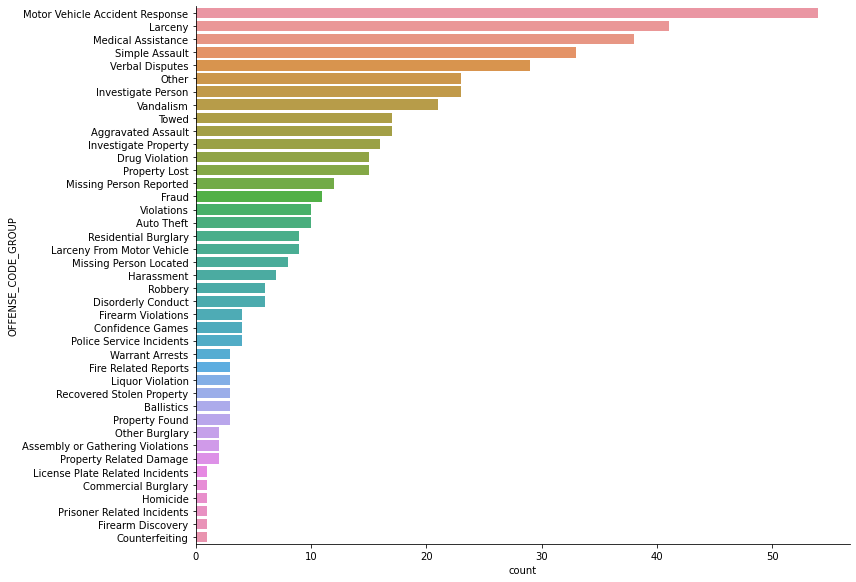

In [14]:
#catplot show the relationship between a numerical and one or more categorical variables using one of several visual representations
sns.catplot(y='OFFENSE_CODE_GROUP', 
            kind = 'count',
            height=8,
            aspect=1.5,
            order=df.OFFENSE_CODE_GROUP.value_counts().index,
            data=df
           )

### Motor Vehicle Accident Response

In [15]:
mv=df.loc[df.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response'][['Lat', 'Long']]

In [16]:
mv

,Lat,Long
9,42.332419,-71.075013
16,42.287579,-71.075273
20,42.286065,-71.070010
24,42.382589,-71.033420
50,42.339761,-71.057092
54,42.264837,-71.099668
55,42.270801,-71.105812
56,42.325610,-71.104500
74,42.363122,-71.130563
86,42.302698,-71.066015


In [25]:
mv.fillna(0, inplace=True)
mv.Lat.fillna(0, inplace=True)
mv.Long.fillna(0, inplace=True)
m4=folium.Map(location=boston, tiles='openstreetmap',zoom_start=12)
HeatMap(data=mv,radius=16).add_to(m4)

In [18]:
m4

### Larceny

In [19]:
lar=df.loc[df.OFFENSE_CODE_GROUP=='Larceny'][['Lat', 'Long']]

In [26]:
lar.Lat.fillna(0, inplace=True)
lar.Long.fillna(0, inplace=True)
m5=folium.Map(location=boston, tiles='openstreetmap',zoom_start=12)
HeatMap(data=lar,radius=16).add_to(m5)

In [21]:
m5

#type this in cmd to extract an html file of these visualization and delete markdown cell : 
jupyter nbconvert file.ipynb --no-input --no-prompt to 
